In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

import caffe

from datasets.cityscapes import cityscapes

from lib import run_net
from lib import score_util
from lib import plot_util

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (12, 12)

Configure caffe and load net

In [2]:
caffe.set_device(0)
caffe.set_mode_gpu()

net = caffe.Net('../nets/cityscapes-fcn8s.prototxt', 
                '../nets/fcn8s-heavy-cityscapes.caffemodel',
                caffe.TEST)

Handle dataset details

In [3]:
CS = cityscapes('/x/cityscapes')
n_cl = len(CS.classes)
valset = CS.get_dset('val')

## Evaluation

Inspect output and check scores on validation set.

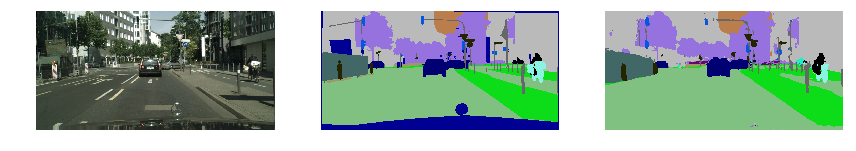

In [4]:
item = random.choice(valset)
im = CS.load_image('val', *item)
gt = CS.load_label('val', *item)
out = run_net.segrun(net, CS.preprocess(im))
plot_util.segshow(im, CS.palette(gt), CS.palette(out))

In [5]:
hist = np.zeros((n_cl, n_cl)) 
for i, item in enumerate(valset):
    if i % 100 == 0:
        print 'running {}/{}'.format(i, len(valset))
        sys.stdout.flush()
    im = CS.load_image('val', *item)
    gt = CS.load_label('val', *item)
    out = run_net.segrun(net, CS.preprocess(im))
    hist += score_util.score_out_gt(out, gt, n_cl=n_cl)   

acc, cl_acc, iu, fw_iu = score_util.get_scores(hist)
print 'val results: acc {:.3f} class acc {:.3f} iu {:.3f} fw iu {:.3f}'.format(acc, cl_acc, iu, fw_iu)

running 0/500
running 100/500
running 200/500
running 300/500
running 400/500
val results: acc 0.942 class acc 0.764 iu 0.664 fw iu 0.895
